<h1> Lab 4 </h1> 
 Akshita Gundavarapu 
<h2> 1 Income and education
<h3> 1.1
    

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
states = pd.read_csv("data /states.csv", sep ="\t")
states.head(3)


,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area
0,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,365,6315,1.5,69.31,11.3,66.7,152,566432
2,2212,4530,1.8,70.55,7.8,58.1,15,113417


In [14]:
states.shape

(50, 8)

<h3> 1.2

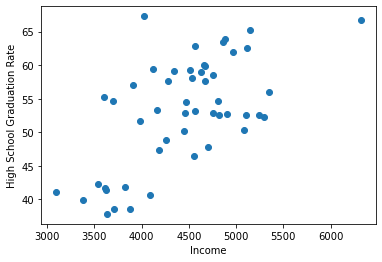

In [6]:
_= plt.scatter(states.Income, states.HSGrad)
_ = plt.xlabel("Income")
_ = plt.ylabel("High School Graduation Rate")

From the scatter plot there seems to be a weak positive correlation betweek Income and Highschool Graduation rate. Thos would mean that the High school gradutation rate seems to be increasing as Income increase. 
<h3> 1.3 

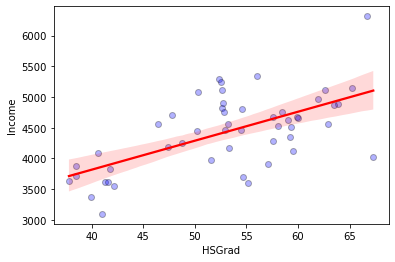

In [23]:
_ = sns.regplot(y = "Income", x = "HSGrad",
            scatter_kws = {"color":"blue", "alpha":0.3, "edgecolor":"black"},
            line_kws={"color":"red"},
            data=states)

<h3> 1.4 </h3> 
Comment on the plot: is the line upward or downward sloping? Do you see the dots trending up/down in a similar fashion as the line?

The line is upward sloping and most of the points appear to be close to the line except for one or two outliers. 

<h3> 1.5

In [12]:
import statsmodels.formula.api as smf

In [15]:
m = smf.ols("Income ~ HSGrad", data=states).fit()

In [16]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     29.96
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.58e-06
Time:                        03:26:00   Log-Likelihood:                -379.35
No. Observations:                  50   AIC:                             762.7
Df Residuals:                      48   BIC:                             766.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1931.1047    462.739      4.173      0.000    1000.705    2861.504
HSGrad        47.1623      8.616      5.474      0.000      29.839      64.486
==============================================================================
Omnibus:                        0.700   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.271
Skew:                           0.165   Prob(JB):                        0.873
Kurtosis:                       3.144   Cond. No.                         361.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3> 1.6 </h3> 
Interpret the coefficients (β0 and β1). What do these numbers mean? Are these statistically significant?

β0 is the intercept of the regression line. It is the predicted value of Income when HSGrad is equal to 0.
β1 is the slope of the regression line.
   
<h3> 1.7 </h3> 
If you did this correctly, you see p-value for HSGrad being “0.000”. What does this number mean?

A p-value of zero would mean that we can reject the null hypothesis that Mean Income = Mean HSGrad. 

<h3> 1.8 </h3> 
Do you get similar results as what you got in PS2? (Hint: you should)

I think this matches my analysis in PS2. We can reject that mean Income is the same as mean HSGrad.



<h2> 2 Global temperature trends
    <h3> 2.1

In [29]:
temp = pd.read_csv("data /UAH-lower-troposphere-wide.csv", sep ="\t")
temp.head(3)

,year,month,globe,globe_land,globe_ocean,nh,nh_land,nh_ocean,sh,sh_land,...,soext_ocean,nopol,nopol_land,nopol_ocean,sopol,sopol_land,sopol_ocean,usa48,usa49,aust
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.45,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29
1,1979,1,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.29,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92
2,1979,2,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-0.36,-2.00,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30


In [30]:
temp.shape

(517, 29)

<h3> 1.2

In [33]:
temp["time"] = temp.year + (temp.month)/12

<h3> 1.3

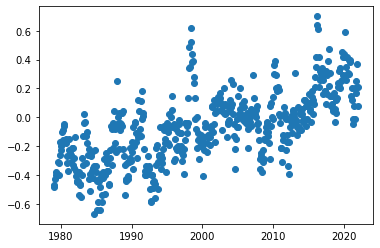

In [35]:
_ = plt.scatter(temp.time, temp.globe)

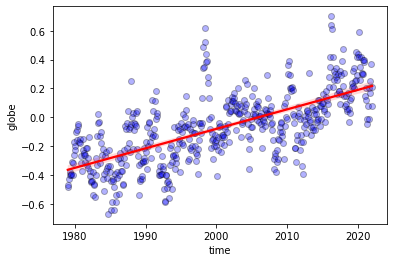

In [25]:
_ = sns.regplot(y = "globe", x = "time",
            scatter_kws = {"color":"blue", "alpha":0.3, "edgecolor":"black"},
            line_kws={"color":"red"},
            data=temp)

<h3> 1.4

In [21]:
m1 = smf.ols("globe ~ time", data=temp).fit()

In [22]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  globe   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     453.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.27e-72
Time:                        04:12:06   Log-Likelihood:                 155.45
No. Observations:                 517   AIC:                            -306.9
Df Residuals:                     515   BIC:                            -298.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.1065      1.270    -21.348      0.000     -29.601     -24.612
time           0.0135      0.001     21.291      0.000       0.012       0.015
==============================================================================
Omnibus:                       23.466   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.265
Skew:                           0.416   Prob(JB):                     2.68e-07
Kurtosis:                       3.845   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3> 1.5 </h3> 
If you did this correctly then your coef for “time” should be 0.0135. What does this number mean? Is it statistically significant?

This number means that the slope of the regression line. This means that for every 1 year increase in time there will be a 0.0135 unit increase in temperature. 


<h3> 1.6 </h3> 
What does intercept mean here?

The intercept here is -27.1065. This means that when the time is 0 the temperature was -27.1065.

<h3> 1.7 </h3> 
Check out the published data. You may read the “GTR” (global temperature report) from University
of Alabama, Huntsville, or you may look for other sources. Did you get a similar trend as published?

The graph from the data looks somewhat similar to the graph created in this lab. The regression line of the graph in the paper looks flat however, my graph is slightly upward sloping. However the dots move in the same pattern as the dots in the research paper. I believe this might indic